# Machine learning is set of techniques to make computers better ata doing things that humans(traditionallly) can do better then machines
# whenever we make dicition
#computer can also be trained in a similar way like human neurone like child 
#Machine learning : deep learning and mathematical model
# Email spam detector, alexa, video recomendation, driverless car

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xlrd
import pickle
import joblib 
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn import tree
import seaborn as sn


In [3]:
# Home price prediction using machine learning model : Lenier regression
home_p=({
    "area":[2600,3000,3200,3600,4000],
    "price":[550000,565000,610000,680000,725000]
})

In [4]:
df=pd.DataFrame(home_p)

In [5]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


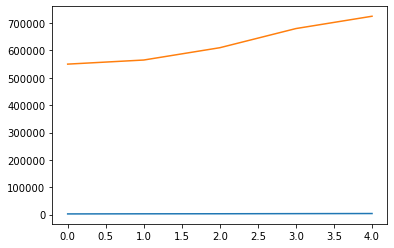

In [6]:
plt.plot(df)

In [7]:
x=[2600,3000,3200,3600,4000] #area
y=[550000,565000,610000,680000,725000]#price
        

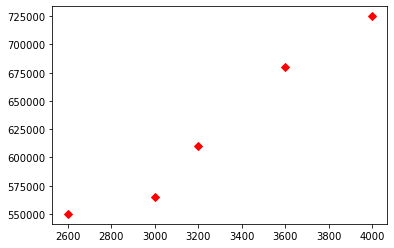

In [8]:
plt.plot(x,y, 'rD')

In [9]:
# minimize the error: sum(i=1 to n)(deltai)^2
#straight line : y=mx+c
#price = m*area + c(intercept)

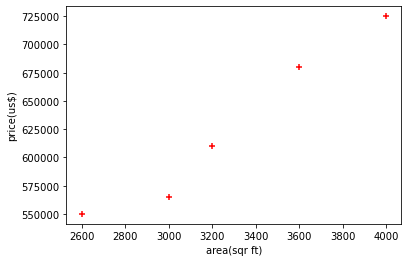

In [10]:
plt.xlabel('area(sqr ft)')
plt.ylabel('price(us$)')
plt.scatter(df.area,df.price , color='red', marker='+')

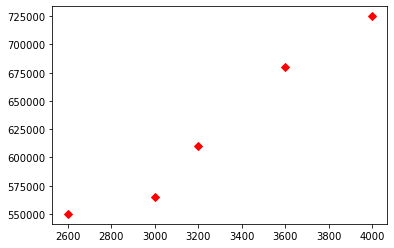

In [11]:
plt.plot(df.area,df.price, 'rD')

In [12]:
# this distrubution is suitable for linear regression model as it is linearly distributed; reg=regression

In [13]:
reg = linear_model.LinearRegression() #create an object for linear regression
# then fit the data means trainning linear regression model
reg.fit(df[['area']], df.price)
# now model is ready for linear regression and to predict the price


LinearRegression()

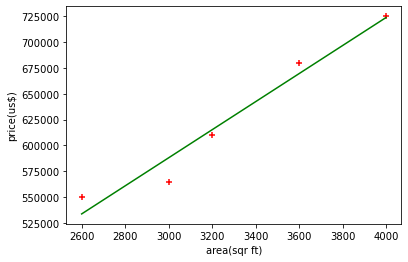

In [14]:
#how linear regression line look like
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

plt.xlabel('area(sqr ft)')
plt.ylabel('price(us$)')
plt.scatter(df.area,df.price , color='red', marker='+')
plt.plot(df.area,reg.predict(df[['area']]),  color='green') #linear regression predict line

In [15]:
reg.predict([[3300]]) #the prsdict price is -> y=mx+c    x=3300

array([628715.75342466])

In [16]:
reg.coef_  # coeficient/gradient/slop/m=135.78..

array([135.78767123])

In [17]:
reg.intercept_  #intercept c=180616.43835

180616.43835616432

In [18]:
def price(x,m,c):
    y=m*x+c
    return y
price(3300,135.78767123,180616.43835616432)

628715.7534151643

In [19]:
# saving model
# save and load trained model using,
# picle 
# sklearn

In [20]:
with open('reg_pickle','wb') as f: # pickle is a binary file wb = write binary now model is saved in the memory
    pickle.dump(reg,f)

In [21]:
with open('reg_pickle', 'rb') as f: #rb = read mode now using the model 
    model = pickle.load(f)          #here model is a object

In [22]:
model.predict([[3300]]) #it give the same answer 

array([628715.75342466])

In [23]:
model.predict([[5000]])

array([859554.79452055])

In [24]:
# if model has large no of numpy array then sklearn joblib is more efficient than pickle

In [25]:
joblib.dump(reg,'reg_joblib') #save the model object

['reg_joblib']

In [26]:
model = joblib.load('reg_joblib') #load back the model to use

In [27]:
model.predict([[5000]]) # it give the same result

array([859554.79452055])

In [28]:
df1 = pd.Series([1000,1500,2300])

In [29]:
df1

0    1000
1    1500
2    2300
dtype: int64

In [30]:
df1 =pd.DataFrame([1000,1500,2300], columns=['area'])

In [31]:
df1

,area
0,1000
1,1500
2,2300


In [32]:
reg.predict(df1)

array([316404.10958904, 384297.94520548, 492928.08219178])

In [33]:
p=reg.predict(df1)

In [34]:
df1['prices']=p # to add these predicted prices columns into df1

In [35]:
df1

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192


In [36]:
df1.to_csv('pred.csv', index=False)# to export df1 in csv file

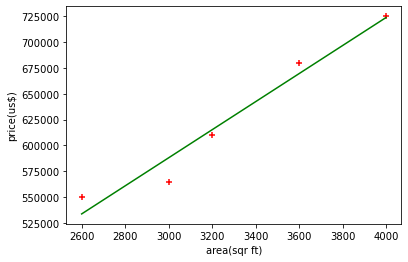

In [37]:
#how linear regression line look like
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

plt.xlabel('area(sqr ft)')
plt.ylabel('price(us$)')
plt.scatter(df.area,df.price , color='red', marker='+')
plt.plot(df.area,reg.predict(df[['area']]),  color='green') #linear regression predict line

In [38]:
# Linear regression with multiple variables a.k.a multivariate regressiojn

In [39]:
Home_prs=({
    'area':[2600,3000,3200,3600,4000],
    'bedrooms':[3,4,2,3,5],
    'age':[20,15,18,30,8],
    'price':[550000,565000,610000,595000,760000]
})

In [40]:
df2=pd.DataFrame(Home_prs)

In [41]:
df2

,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,2,18,610000
3,3600,3,30,595000
4,4000,5,8,760000


In [42]:
# find prices:
# 1.3000 sqr ft area, 3 bedrooms, 40 year old
# 2.2500 sqr ft area 4 bedrooms, 5 year old

In [43]:
# price = m1*area+m2*bedrooms+m3*age+b
# y=m1x1+m2x2+m3x3+b

In [44]:
df2 =pd.read_csv("D:/cars/home_price.csv")

In [45]:
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [46]:
# first we have to handle NaN

In [47]:
df2.bedrooms.median()

3.5

In [48]:
# as bedroom can't be fractional so we make it integer

In [49]:
import math
median_bedrooms = math.floor(df2.bedrooms.median())

In [50]:
median_bedrooms

3

In [51]:
f = df2.bedrooms.fillna(median_bedrooms)

In [52]:
f

0    3.0
1    4.0
2    3.0
3    3.0
4    5.0
Name: bedrooms, dtype: float64

In [53]:
df2.bedrooms= f 

In [54]:
df2

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [55]:
reg = linear_model.LinearRegression()

In [56]:
reg

LinearRegression()

In [57]:
reg.fit(df2[['area','bedrooms','age']],df2.price) #independent variables are area,bedrooms,age and target variable is price

LinearRegression()

In [58]:
# now the model is ready
reg.coef_  #m1,m2,m3

array([   137.25, -26025.  ,  -6825.  ])

In [59]:
reg.intercept_       #b

383724.9999999998

In [60]:
reg.predict([[3000,3,40]])  # 1.3000 sqr ft area, 3 bedrooms, 40 year old; predicted home price is-

array([444400.])

In [61]:
reg.predict([[2500,4,5]]) ## 2.2500 sqr ft area 4 bedrooms, 5 year old; predicted home prices is-0

array([588625.])

In [62]:
df3 = pd.read_excel("D:/cars/home_price.xlsx", sheet_name="Sheet2")

In [63]:
df3

,experience,test score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,NaN,6.0,7,60000
3,five,6.0,7,65000
4,two,10.0,10,70000
5,seven,9.0,6,70000
6,three,7.0,10,62000
7,ten,NaN,7,72000
8,eleven,7.0,8,80000


In [64]:
# # exercise
# 1.2 yr exp 9 test score 6 interview score
# 2.12 yr exp, 10 test  score, 10 interview score

In [65]:
#how to drwan the regression line> error minimization

In [66]:
# deltai = difference between actual data point  from regression line or predicted data point 
# n = no of data point#

In [67]:
# 1/n sumation from i=1 to n (deltai)^2
#mean squre error-mse:
# =1/n summation fromi=0 to n (yi-ypredicted)^2
# mse is called cost Functoin

In [68]:
#gradiant descent algorithm

In [69]:
# Gradient descent is an algorithm that finds best fit line for given training dataset

In [70]:
# find minima for mse  by changing the vallue of m and b (using integration dy^2/d^2.x =0,dy/dx = negative)

In [71]:
# Derivativ f(x,y) = x^3 +y^3
# df/dx=3x^2 +0 #partial derivativ 
#df/dy = 0+ 2y partial derivative

In [72]:
# mse = i/n sumation from i=1 to n (yi-(mxi+b))^2 # mxi+b = y(predicted on the regression line)
# d/dm = 2/n sumation from i=1 to n -xi(yi-(mxi+b))# partial integration that is actually slop of graph mse vs m ie d(mse)/dm
# d/db = 2/n sumatoin from i=2 to n -(yi-(mxi+b)) # ,,  slop of graph mse vs b ie d(mse)/dm

In [73]:
# m = m - learning rate*d/dm
# b = b - learning rate*d/dm

In [74]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 10
    n = len(x)
    learning_rate = 0.1
    
    for i in range(iterations):
        y_predicted = m_curr*x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate *md
        b_curr = b_curr - learning_rate *bd
        print ("m {}, b {}, cost {}, iteration {}".format(m_curr,b_curr,cost,i))
        plt.plot
        
        
x = np.array([1,2,3,4,5])
y = np.array([5,6,9,11,13])

gradient_descent(x,y)

m 6.120000000000001, b 1.7600000000000002, cost 86.4, iteration 0
m -2.280000000000003, b -0.5040000000000004, cost 160.60320000000013, iteration 1
m 9.158400000000006, b 2.7248000000000014, cost 299.13753600000035, iteration 2
m -6.504960000000009, b -1.5552000000000024, cost 557.7420211200009, iteration 3
m 14.859072000000014, b 4.418816000000003, cost 1040.452352409602, iteration 4
m -14.362176000000018, b -3.620390400000007, cost 1941.4488251473967, iteration 5
m 25.526845440000024, b 7.480993280000005, cost 3623.164467574218, iteration 6
m -29.000810496000035, b -7.571312640000013, cost 6762.072012270987, iteration 7
m 45.46376017920006, b 13.10343618560001, cost 12620.79180205745, iteration 8
m -56.298573926400074, b -15.03550715904003, cost 23555.9747075799, iteration 9


In [75]:
gradient_descent(x,y)

m 6.120000000000001, b 1.7600000000000002, cost 86.4, iteration 0
m -2.280000000000003, b -0.5040000000000004, cost 160.60320000000013, iteration 1
m 9.158400000000006, b 2.7248000000000014, cost 299.13753600000035, iteration 2
m -6.504960000000009, b -1.5552000000000024, cost 557.7420211200009, iteration 3
m 14.859072000000014, b 4.418816000000003, cost 1040.452352409602, iteration 4
m -14.362176000000018, b -3.620390400000007, cost 1941.4488251473967, iteration 5
m 25.526845440000024, b 7.480993280000005, cost 3623.164467574218, iteration 6
m -29.000810496000035, b -7.571312640000013, cost 6762.072012270987, iteration 7
m 45.46376017920006, b 13.10343618560001, cost 12620.79180205745, iteration 8
m -56.298573926400074, b -15.03550715904003, cost 23555.9747075799, iteration 9


In [76]:
# https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21
# https://statisticsbyjim.com/regression/mean-squared-error-mse/
# https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/

In [77]:
# build a predictor function to predict price of a home
# 1.with 3400 sqr ft area in west windsor
# 2.2800 sqr ft home in robbinsville

In [78]:
# machine learning model is good with handleing numerical data then how to handle text data

In [79]:
#integer encoding: like
# monroe township=1, west windso =2,robbinsville=3
# this variable is categorical variable: so monroe township+west windso = robbinsville or township<west windso<robbinsville its not possible

In [80]:
#  categorical variable two types:
# 1.nominal(name): like male female green red blue have no numerical order
# 2.ordinal(status): high medium low gradutes masters phd satisfied newtral dissatisfied these somehow can be ordered by number 
#like graduates < master<phd and satisfaction rating

In [81]:
# so for nominal categorical variable simple integer encoding doesnot going to work
# for this we use-one hot encodding

In [82]:
# you use one of column for one cateegoris and asssign  binary  values 1 or 0:
# and this extra columns is created is called dummy variable

In [83]:
df4 = pd.read_excel('D:/cars/home_price.xlsx', sheet_name="Sheet1")

In [84]:
df4

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,west windso,4000,725000
5,west windso,2600,585000
6,west windso,2800,615000
7,west windso,3300,650000
8,robinsville,3600,710000
9,robinsville,2600,575000


In [85]:
#to create dummy variables columns
dummies = pd.get_dummies(df4.town)
dummies

,monroe township,robinsville,west windso
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,1,0
9,0,1,0


In [86]:
# to concat this dummies dataframe with original dataframe 
merged = pd.concat([df4,dummies], axis ='columns')

In [87]:
merged

,town,area,price,monroe township,robinsville,west windso
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,west windso,4000,725000,0,0,1
5,west windso,2600,585000,0,0,1
6,west windso,2800,615000,0,0,1
7,west windso,3300,650000,0,0,1
8,robinsville,3600,710000,0,1,0
9,robinsville,2600,575000,0,1,0


In [88]:
# now we do not required town column that is text column so we drop it
# and we have to drop one of this dummy variables : dummy variable trap : https://www.learndatasci.com/glossary/dummy-variable-trap/
#             these dummy variables are highly correlated or multicollinear so one dummy variables always can be predicted by other dummy variables
#             if it is not done then ml model get into a trap and  become meshy

In [89]:
final = merged.drop(['town','west windso'], axis='columns')

In [90]:
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,0,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,1
9,2600,575000,0,1


In [91]:
model = linear_model.LinearRegression() #to create linear regression model objectd

In [92]:
x = final.drop(['price'], axis='columns') # x that represent area is independent variable
x

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,0,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,1
9,2600,0,1


In [93]:
y = final.price # it is dependent variable
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
Name: price, dtype: int64

In [94]:
model.fit(x,y) # to train your machine learning model

LinearRegression()

In [95]:
# now use this model
model.predict([[3600,0,1]]) # for robbinesville

array([689403.88951522])

In [96]:
model.predict([[2600,1,0]]) # for monroe toenship

array([543837.37316798])

In [97]:
model.predict([[4000,0,0]]) # for west windso

array([738480.83427283])

In [98]:
model.predict([[3500,1,1]]) # for what??

array([644033.25817362])

In [99]:
model.score(x,y)

0.9354632594262808

In [100]:
df4

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,west windso,4000,725000
5,west windso,2600,585000
6,west windso,2800,615000
7,west windso,3300,650000
8,robinsville,3600,710000
9,robinsville,2600,575000


In [101]:
#another type of encoder is Label Encoder

In [102]:
le = LabelEncoder()

In [103]:
dfle = df4
dfle.town = le.fit_transform(dfle.town)

In [104]:
dfle.town

0     0
1     0
2     0
3     0
4     2
5     2
6     2
7     2
8     1
9     1
10    1
11    1
Name: town, dtype: int32

In [105]:
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,2,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,1,3600,710000
9,1,2600,575000


In [106]:
x = df4[['town','area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   2, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   1, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100]], dtype=int64)

In [107]:
# x = df4[['town','area']]
# x

In [108]:
df4

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,2,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,1,3600,710000
9,1,2600,575000


In [109]:
y = df4.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
Name: price, dtype: int64

In [110]:
# ohe = OneHotEncoder() #0th column is categorial feature

In [111]:
# x = ohe.fit_transform(x)???
# x.toarray(x)????

In [112]:
model = linear_model.LinearRegression()

In [113]:
model.fit(x,y)

LinearRegression()

In [114]:
model.predict([[0,2600]]) #by using lebel Encoder

array([549113.75907652])

In [115]:
df5 = pd.read_csv('D:/cars/bmw.txt')

In [116]:
df5

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [117]:
# Exercise:
#     1.predict price of a mercedeze benze that is 4 years old with milage 45000
#     2.predict price of a bmw x5 that is 7 yr old with  milage 86000
#     3.tell me the score of your model.(use linear regression().score)

In [118]:
# make the machine learning  model using whole dataset is not a good strategy so we split the whole dataset into trainning datset(80%) and testing dataset
#trainning dataset and testing dataset :

In [119]:
# df6 = pd.read_csv('https://github.com/codebasics/py/blob/master/ML/6_train_test_split/carprices.csv',  on_bad_lines='skip')

In [120]:
# df6

In [121]:
df6 = pd.read_csv('D:/cars/milage.txt')

In [122]:
df6

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [123]:
# car milage vs sell price

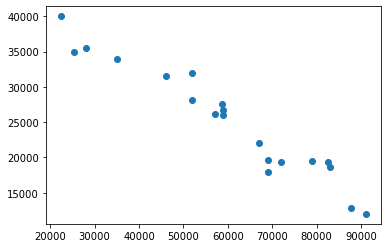

In [124]:
plt.scatter(df6['Mileage'],df6['Sell Price($)'])

In [125]:
# car age vs sell price:

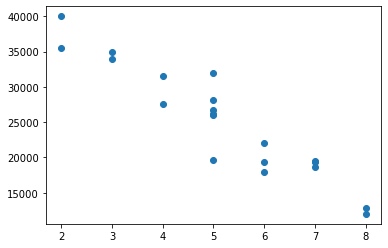

In [126]:
plt.scatter(df6['Age(yrs)'],df6['Sell Price($)'])

In [127]:
x = df6[['Mileage','Age(yrs)']]
y = df6['Sell Price($)']

In [128]:
x

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [129]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10) # test size=0.2 means 20% and train size 80% randdom state use for change train data

In [131]:
len(x_train)

16

In [132]:
len(x_test)

4

In [133]:
x_train

,Mileage,Age(yrs)
3,22500,2
18,87600,8
13,58780,4
2,57000,5
14,82450,7
8,91000,8
17,69000,5
16,28000,2
19,52000,5
12,59000,5


In [134]:
len(x_test)

4

In [135]:
x_test

,Mileage,Age(yrs)
7,72000,6
10,83000,7
5,59000,5
6,52000,5


In [136]:
clf = linear_model.LinearRegression()

In [137]:
clf.fit(x_train,y_train)

LinearRegression()

In [138]:
clf.predict(x_test) #=y_test

array([20474.0745775 , 16352.07892168, 25174.14834912, 27197.42175439])

In [139]:
y_test

7     19300
10    18700
5     26750
6     32000
Name: Sell Price($), dtype: int64

In [140]:
clf.score(x_test,y_test)

0.7332339593090137

# Logistic Regression

In [141]:
# 1.home prices, weather ,stock price etc these are continuous so the predicted value is also continuous and numerical  that is Lenear Regressio

In [142]:
# but email is spam or not , will customer buy life indurance?, dwhich party a person is going to vote for - 1.democratic 2.republican 3. independent?
# these value is categorial  like for 1st and 2nd example answer will be yes or no for 3rd example answer will be from 3 option

In [143]:
# classification Tupes:
#     1.Binary classification:
#         will customer buy life insurance? yes or no
#     2.Multiclass Classification:
#         which party a person is going to vote for?
#         1.Democratic
#         2.Republican
#         3.Independent

In [144]:
# Sigmoid or logit function:
   
#     sigmoid(z)=1/(1+e^-z) # where e = Euler's number ~ 2.71828
    
#     sigmoid function converts input into range 0 to 1

In [145]:
# to change linear function f(x) to sigmoid function
# linear function: y=mx+b
    
# sigmoid function: y = 1 /(1+e-^(mx+b))

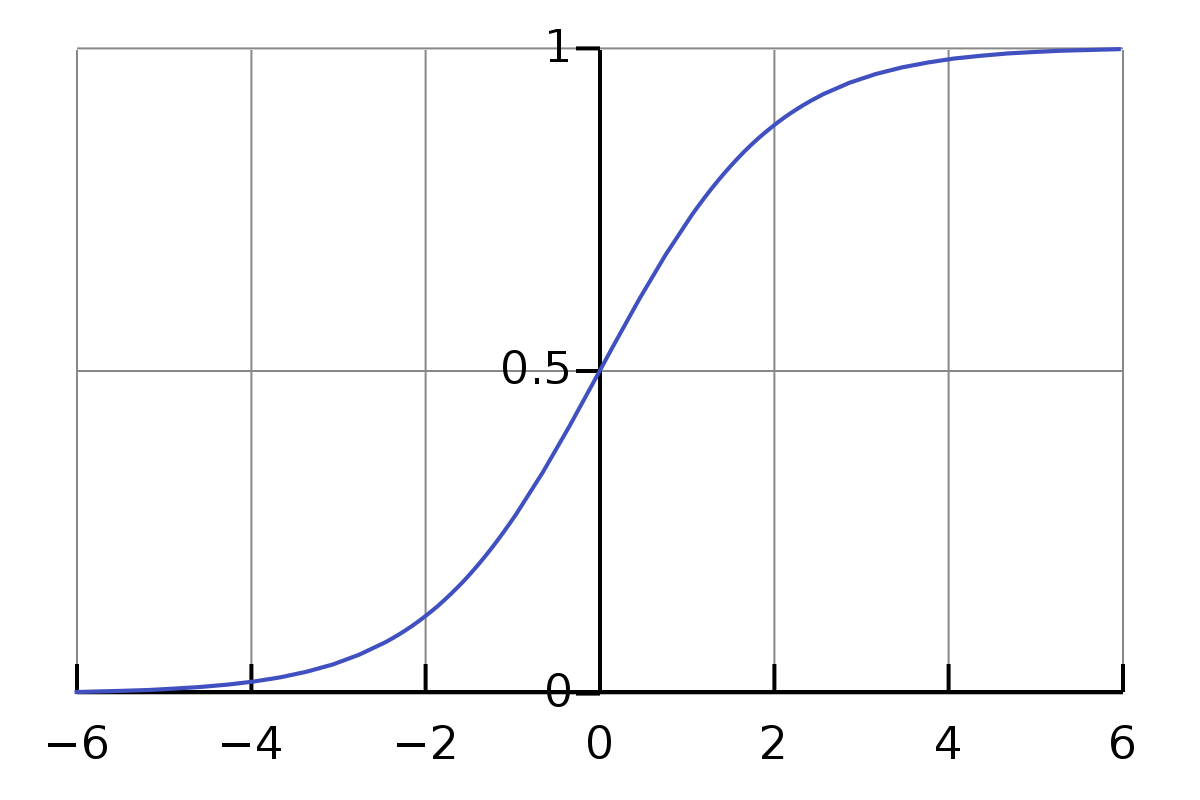

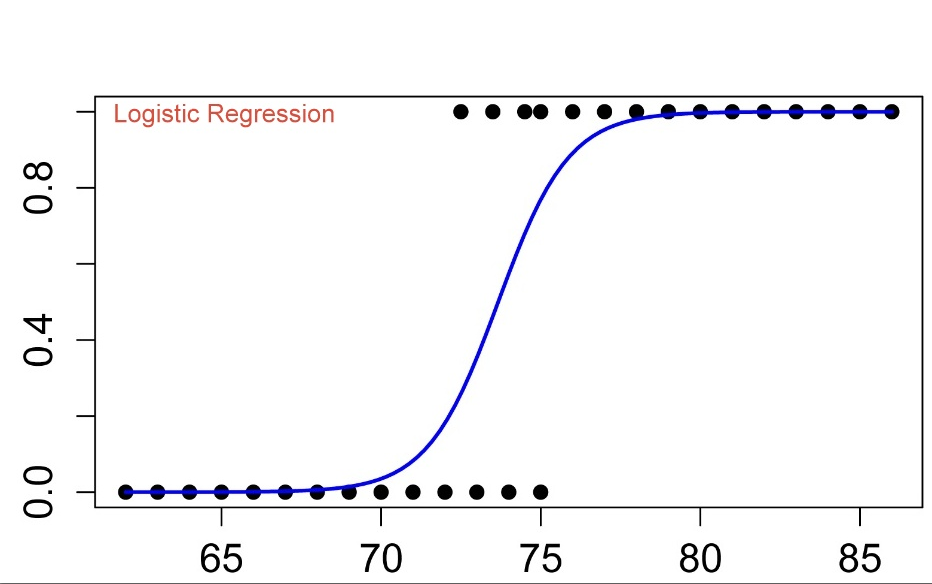

In [146]:
df7 = pd.read_csv('D:/cars/insu.txt')

In [147]:
df7

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


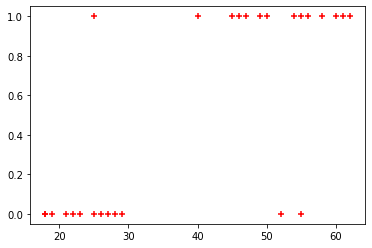

In [148]:
plt.scatter(df7.age, df7.bought_insurance,  marker='+', color='red')

In [149]:
s = train_test_split(df7[['age']],df7.bought_insurance,train_size=0.9)

In [150]:
x_train, x_test, y_train,y_test = s

In [151]:
x_train

,age
3,52
13,29
22,40
25,54
5,56
19,18
2,47
18,19
6,55
0,22


In [152]:
y_train

3     0
13    0
22    1
25    1
5     1
19    0
2     1
18    0
6     0
0     0
24    1
26    0
20    0
4     1
12    0
11    0
1     0
10    0
23    1
15    1
14    1
21    0
16    1
7     1
Name: bought_insurance, dtype: int64

In [153]:
x_test

,age
9,61
17,58
8,62


In [154]:
model = linear_model.LogisticRegression()

In [155]:
model

LogisticRegression()

In [156]:
model.fit(x_train,y_train)

LogisticRegression()

In [157]:
model.predict(x_test) #= y_test

array([1, 1, 1], dtype=int64)

In [158]:
y_test

9     1
17    1
8     1
Name: bought_insurance, dtype: int64

In [159]:
model.score(x_test,y_test)

1.0

In [160]:
model.predict_proba(x_test) # to predict the probablity of buy and not buy for first row buy=1 is 0.7700 and notBuy=0 0.2299

array([[0.05776575, 0.94223425],
       [0.0826838 , 0.9173162 ],
       [0.05115747, 0.94884253]])

In [161]:
model.predict([[50]])

array([1], dtype=int64)

In [162]:
# Exercise
df8 = pd.read_csv('D:/cars/HR_data.txt')
# 1.now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention(ie whether they leave the company or continue to work)
# 2.plot bar charts showing corelation between department and employee retention
# 5.plot bar charts showing impact of employee salaries on retention
# 3.now build logistic regression model using variables that were narrowed down in step 1
# 4.measure the accuracy of the model

# identify hand written digits recognition

In [163]:
# [0,1,2,3,4,5,6,7,8,9]

In [164]:
from sklearn.datasets import load_digits

In [165]:
digits = load_digits()

In [166]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [167]:
# digits

In [168]:
digits.data[9] #this array is represent bunch of images and this data represent colour gradient of each pixel like 0 means totally black and 15 means max white .

array([ 0.,  0., 11., 12.,  0.,  0.,  0.,  0.,  0.,  2., 16., 16., 16.,
       13.,  0.,  0.,  0.,  3., 16., 12., 10., 14.,  0.,  0.,  0.,  1.,
       16.,  1., 12., 15.,  0.,  0.,  0.,  0., 13., 16.,  9., 15.,  2.,
        0.,  0.,  0.,  0.,  3.,  0.,  9., 11.,  0.,  0.,  0.,  0.,  0.,
        9., 15.,  4.,  0.,  0.,  0.,  9., 12., 13.,  3.,  0.,  0.])

In [169]:
for i in range(5):
    print(digits.data[i])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14

In [170]:
plt.gray()

<Figure size 432x288 with 0 Axes>

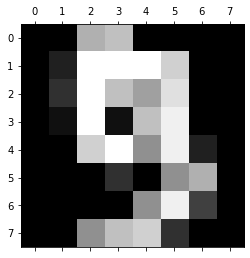

In [171]:
plt.matshow(digits.images[9])

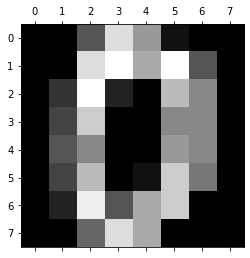

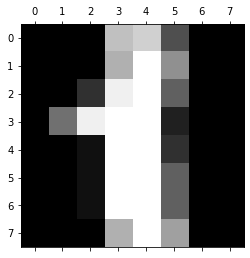

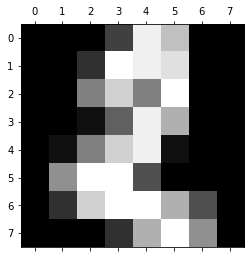

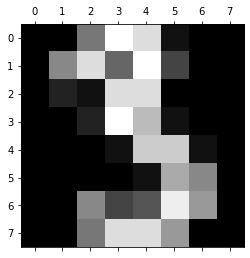

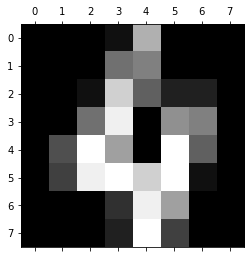

In [172]:
for i in range(5):
    plt.matshow(digits.images[i])

In [173]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [174]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [175]:
digits.target[9]

9

In [176]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target, test_size=0.2)

In [177]:
x_train

array([[ 0.,  0., 10., ...,  7.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  6., ..., 14., 13.,  0.],
       ...,
       [ 0.,  0., 11., ..., 16.,  4.,  0.],
       [ 0.,  0., 12., ...,  0.,  0.,  0.],
       [ 0.,  0., 11., ..., 16., 16., 10.]])

In [178]:
y_train

array([9, 4, 2, ..., 3, 5, 2])

In [179]:
len(x_train)

1437

In [180]:
len(x_test)

360

In [181]:
dmodel = linear_model.LogisticRegression()

In [182]:
dmodel.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [183]:
dmodel.score(x_test,y_test)

0.9638888888888889

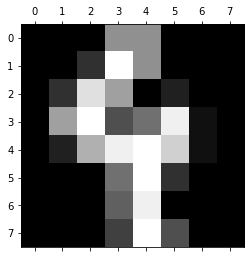

In [184]:
plt.matshow(digits.images[68])

In [185]:
digits.target[68]

4

In [186]:
dmodel.predict([digits.data[68]])

array([4])

In [187]:
dmodel.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [188]:
y_predicted = dmodel.predict(x_test)

In [189]:
y_predicted

array([0, 1, 3, 9, 2, 2, 3, 5, 6, 4, 5, 7, 6, 0, 1, 6, 4, 5, 1, 7, 1, 0,
       7, 1, 3, 4, 1, 5, 6, 4, 6, 2, 4, 0, 2, 4, 5, 2, 7, 7, 5, 8, 9, 4,
       5, 3, 0, 1, 8, 2, 2, 4, 1, 4, 5, 0, 1, 4, 7, 1, 1, 6, 5, 4, 6, 6,
       9, 6, 6, 6, 8, 9, 7, 4, 7, 8, 9, 9, 8, 0, 2, 4, 8, 2, 2, 7, 5, 7,
       5, 6, 3, 5, 7, 4, 2, 1, 7, 2, 9, 7, 8, 9, 6, 4, 1, 6, 2, 1, 8, 4,
       5, 2, 3, 3, 9, 1, 7, 9, 0, 0, 9, 5, 9, 6, 0, 4, 8, 2, 0, 5, 3, 0,
       3, 5, 3, 4, 0, 7, 7, 8, 3, 2, 0, 6, 7, 3, 3, 5, 9, 1, 6, 9, 8, 2,
       6, 9, 0, 1, 9, 7, 6, 1, 1, 4, 6, 5, 4, 1, 5, 9, 4, 7, 8, 5, 1, 8,
       6, 6, 3, 2, 8, 3, 6, 0, 8, 3, 6, 1, 7, 7, 5, 3, 2, 9, 1, 8, 3, 5,
       9, 4, 7, 0, 9, 2, 9, 2, 3, 4, 2, 3, 6, 4, 0, 8, 1, 3, 3, 4, 7, 5,
       4, 4, 6, 4, 1, 2, 4, 3, 8, 5, 9, 2, 8, 4, 3, 2, 7, 0, 5, 1, 8, 5,
       6, 1, 0, 7, 2, 6, 3, 6, 7, 5, 8, 5, 5, 5, 4, 4, 3, 4, 0, 9, 4, 3,
       1, 3, 9, 2, 0, 3, 2, 9, 8, 4, 5, 8, 6, 6, 0, 3, 6, 2, 9, 3, 5, 1,
       2, 6, 7, 9, 1, 1, 7, 5, 7, 1, 5, 1, 9, 1, 6,

In [190]:
y_test

array([0, 8, 3, 9, 2, 2, 7, 5, 6, 4, 5, 7, 6, 0, 1, 6, 4, 5, 1, 4, 1, 0,
       7, 1, 3, 4, 1, 5, 6, 4, 6, 2, 4, 0, 2, 4, 5, 2, 7, 7, 5, 8, 9, 4,
       5, 3, 0, 1, 8, 2, 2, 4, 1, 4, 5, 0, 1, 4, 7, 1, 8, 6, 5, 4, 6, 6,
       9, 6, 6, 6, 8, 9, 7, 4, 7, 8, 9, 9, 8, 0, 2, 4, 8, 2, 2, 7, 5, 7,
       5, 6, 3, 5, 7, 4, 2, 4, 7, 2, 9, 7, 8, 9, 6, 4, 1, 6, 8, 1, 8, 4,
       5, 2, 3, 3, 9, 1, 7, 9, 0, 0, 9, 5, 9, 6, 0, 4, 8, 2, 0, 5, 3, 0,
       3, 5, 3, 4, 0, 7, 7, 8, 3, 2, 0, 6, 7, 3, 3, 5, 9, 1, 6, 9, 8, 2,
       6, 9, 0, 1, 9, 7, 6, 1, 1, 4, 6, 5, 4, 1, 5, 9, 4, 7, 8, 5, 1, 8,
       6, 6, 3, 2, 8, 3, 6, 0, 8, 1, 6, 1, 7, 7, 5, 3, 2, 9, 1, 8, 3, 5,
       3, 4, 7, 0, 9, 2, 9, 2, 3, 4, 2, 3, 6, 4, 0, 8, 1, 3, 3, 4, 7, 5,
       5, 4, 6, 4, 1, 2, 4, 3, 8, 5, 9, 2, 8, 4, 3, 2, 7, 0, 6, 1, 8, 5,
       6, 1, 0, 7, 2, 6, 3, 6, 7, 5, 8, 5, 5, 5, 4, 4, 3, 4, 0, 9, 4, 3,
       1, 3, 9, 2, 0, 3, 2, 9, 8, 4, 5, 8, 6, 6, 0, 3, 6, 2, 9, 3, 5, 1,
       2, 6, 7, 9, 8, 1, 7, 5, 7, 1, 5, 1, 9, 1, 6,

In [191]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 36,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 42,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 35,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 25,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 32]], dtype=int64)

In [192]:
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

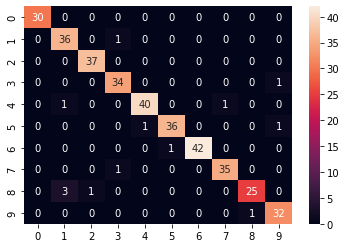

In [193]:
sn.heatmap(cm, annot=True)

Text(0, 0.5, 'Truth')

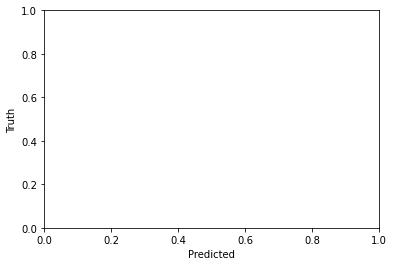

In [194]:
plt.xlabel('Predicted') #y_predicted
plt.ylabel('Truth') #y_test

Text(33.0, 0.5, 'Truth')

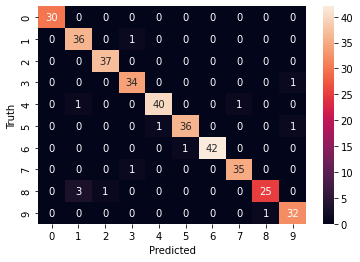

In [195]:
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [196]:
# row 1: for 37 : 37 times when truth was zero and model predicted yet to be zero
# row 9: for 1 : 1 times when truth was 8 and but model said it no it is 1 
# row 10: for 1: 1 times when truth was 9 and but model said no it is 3

# in black area where there is no. except 0 that is model is not working properly

In [197]:
# #Exercise:
# use sk.learn datasets iris flower dataset to train your model using logistic regression . you need to figure out accuracy of your model:
#     1.sepal length
#     2.sepal width
#     3.petal length
#     4.petal width
# using above 4 feature you will classify a flower in one of the three categories,
#     1.setosa
#     2.versicolour
#     3,virginia

In [198]:
# Discition Tree:

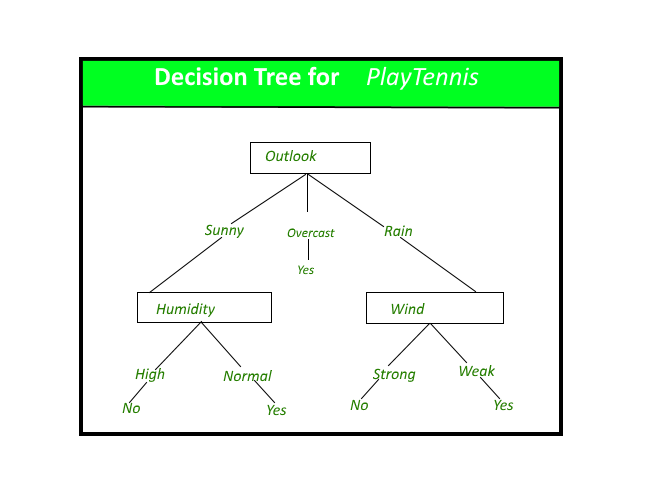

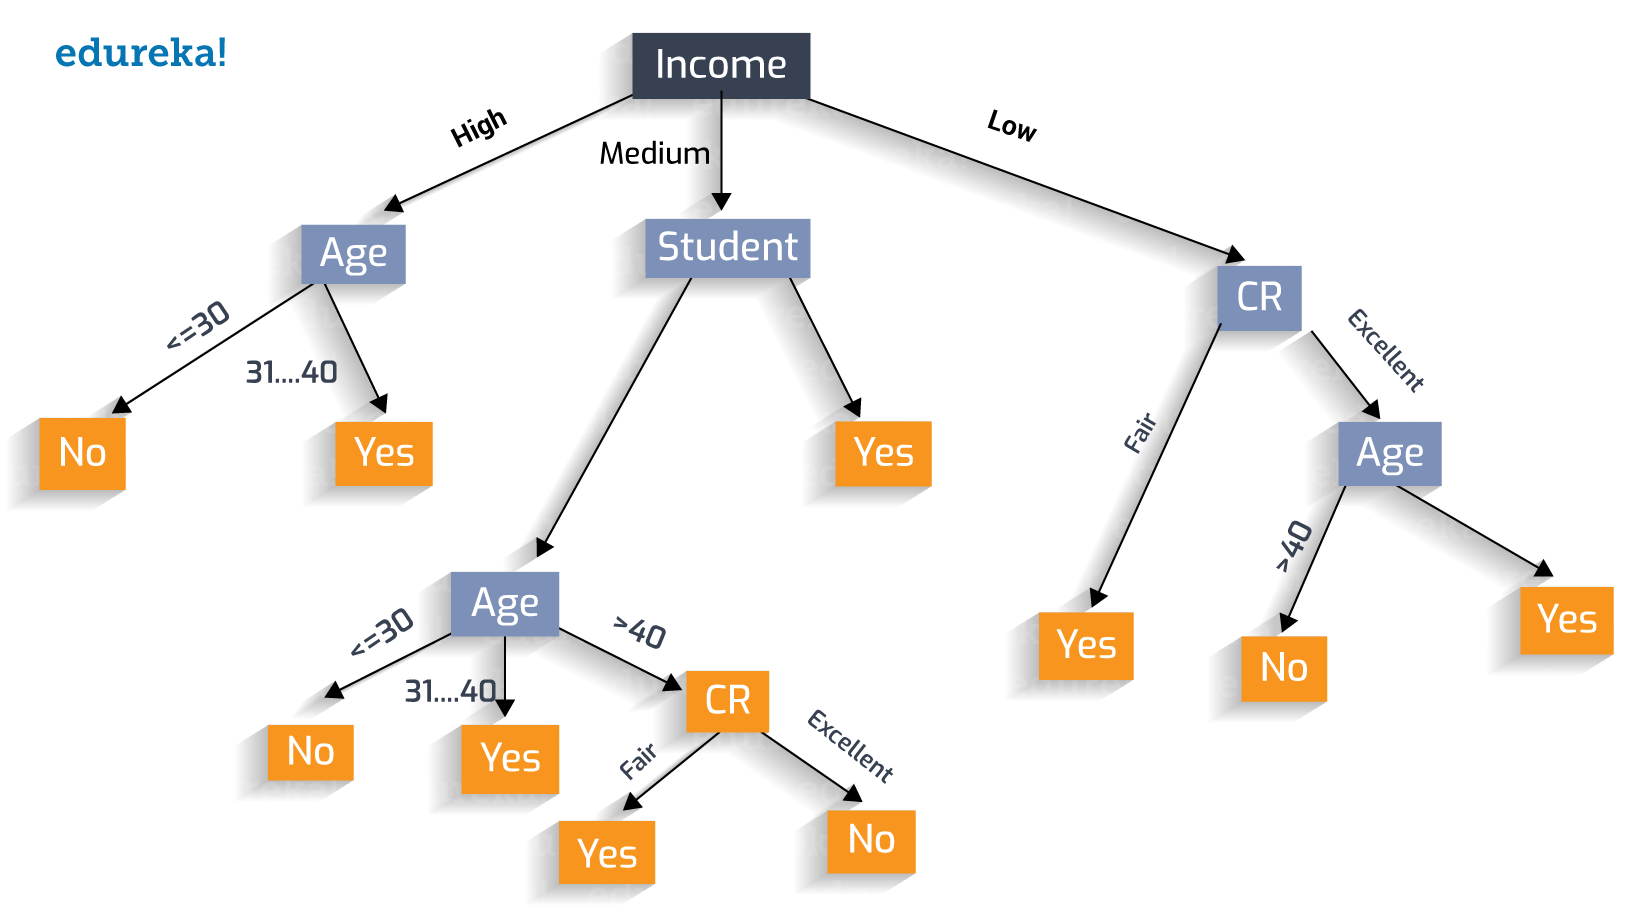

In [200]:
# Entropy: measure the randomness
#     from 6 datapoints:
#         if all are green then entropy 6/0 (low entropy)
#         if 1 is green and 3 are red  then entropy 1/3
#         if 3 are green and 3 are red then entropy is 3/3
#         if 4 are green and 2 are red then entropy is 4/
# first two points are called High information gain and last two points are called Low information gain 

In [201]:
# GINI IMPURITY

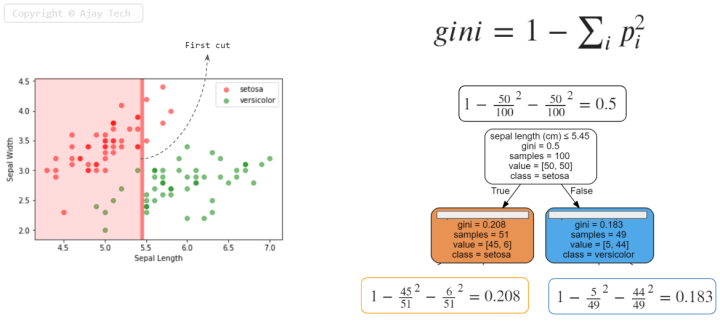

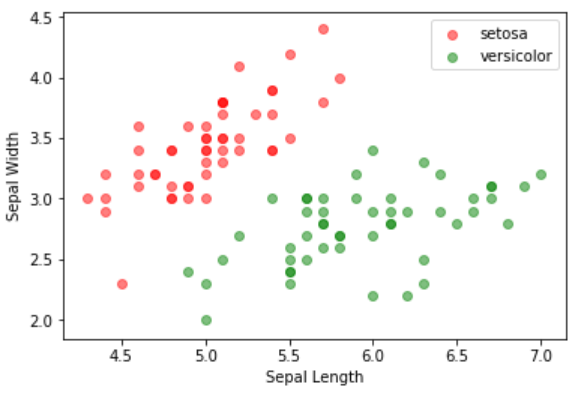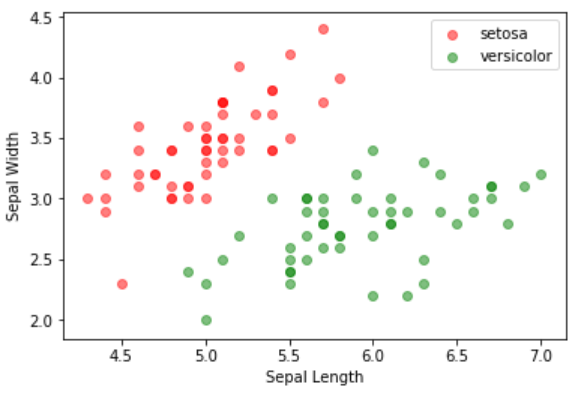

In [2]:
df8 = pd.read_csv("D:/cars/salary.txt")

In [3]:
df8.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
inputs = df8.drop('salary_more_then_100k', axis='columns') #to drop this columns

In [5]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [6]:
target = df8['salary_more_then_100k']

In [7]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [8]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [12]:
inputs['company_n'] = le_company.fit_transform(inputs['company']) # to create new columns dummy columns encoded
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [13]:
inputs_n = inputs.drop(['company','job','degree'], axis=1)

In [14]:
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [16]:
model = tree.DecisionTreeClassifier()

In [17]:
model

DecisionTreeClassifier()

In [18]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n,target)

1.0

In [28]:
inputs_n[6:7]

,company_n,job_n,degree_n
6,0,2,1


In [29]:
model.predict([[0,2,1]])

array([0], dtype=int64)

In [30]:
target[6]

0

In [31]:
# Exercise: titanic survival rate- 

In [32]:
df9 = pd.read_csv('D:/cars/titanic.txt')

In [33]:
df9.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Support Vector Machine (SVM)

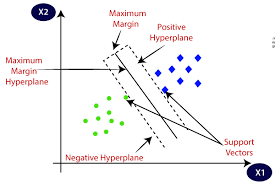

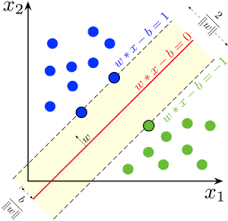

In [3]:
# Gamma and regularization

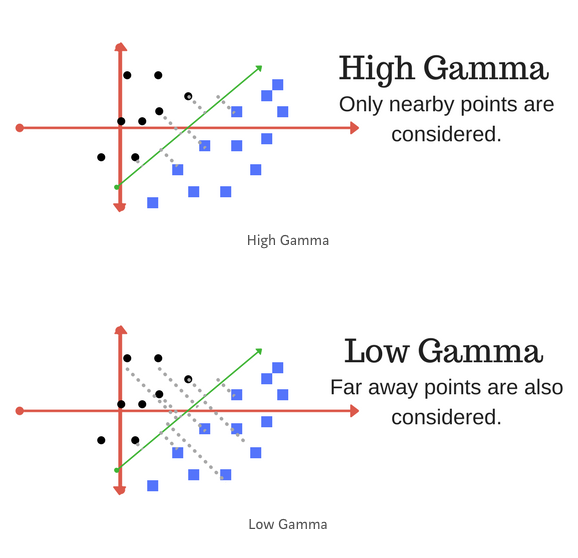

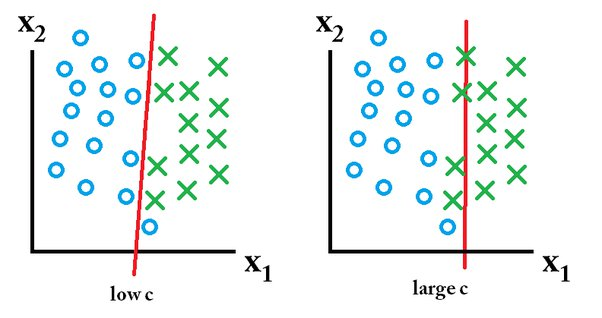

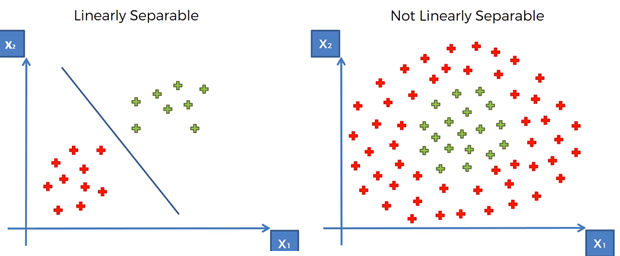

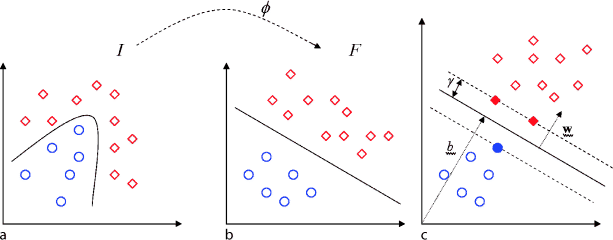

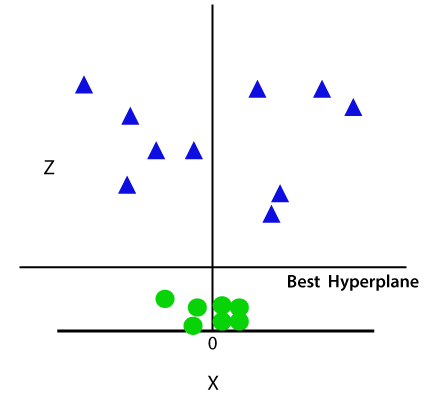

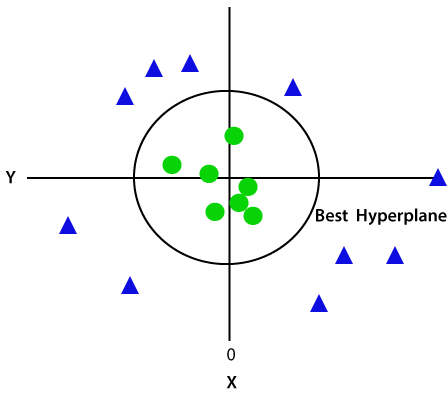

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [8]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [9]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [10]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target'] = iris.target #to create new columns name target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [16]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [18]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [23]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [24]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [25]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


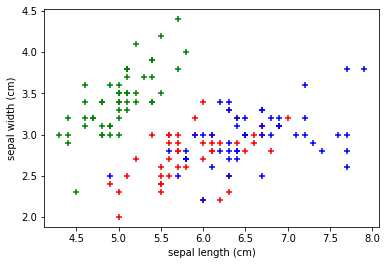

In [26]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
           
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='red',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color='blue',marker='+')

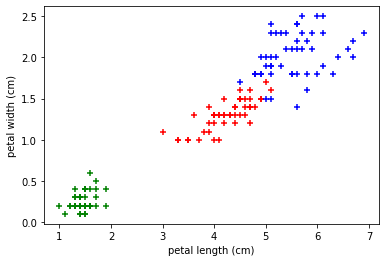

In [27]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
           
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color='red',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'], color='blue',marker='+')

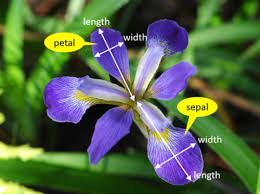

In [28]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [29]:
x = df.drop(['target','flower_name'], axis='columns')

In [30]:
x.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [31]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
y = df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [34]:
len(x_train)

120

In [35]:
len(x_test)

30

In [ ]:
model = SVC(kernel='linear')

In [40]:
model.fit(x_train,y_train)

SVC(kernel='linear')

In [41]:
model.score(x_test,y_test)

0.9666666666666667

In [42]:
# Exercise:
# 1.Measure accuracy of your model using different kernels such as rbf and linear 
# 2.Tune your model further using regularization and gamma parameters and try to come up with highest accuracy score
# 3.Use 80% of samples as training data size

In [43]:
# RANDOM FOREST ALGORITHM:

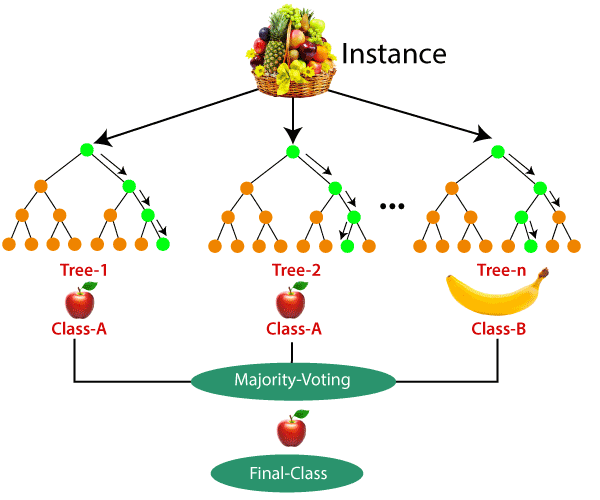

In [8]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
plt.gray()

<Figure size 432x288 with 0 Axes>

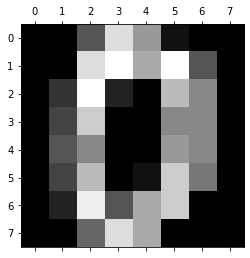

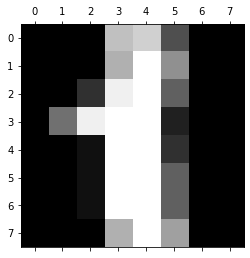

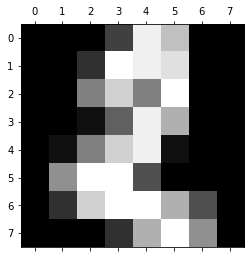

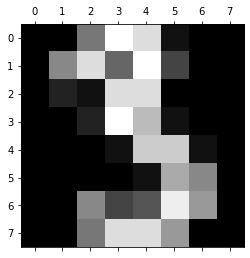

In [5]:
for i in range(4):
    plt.matshow(digits.images[i]) #8x8 pixel =64 data points for one dataset of  each number

In [6]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [7]:
df= pd.DataFrame(digits.data)

In [8]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [10]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
x_train,x_test,y_train,y_test  =train_test_split(df.drop(['target'],axis='columns'), digits.target,test_size=0.2)

In [12]:
len(x_train)

1437

In [13]:
len(x_test)

360

In [19]:
model = RandomForestClassifier()

In [20]:
model

RandomForestClassifier()

In [16]:
y_train

array([5, 5, 9, ..., 3, 7, 8])

In [21]:
model = RandomForestClassifier(n_estimators=40)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

In [22]:
model.score(x_test,y_test)

0.9805555555555555

In [23]:
y_predicted = model.predict(x_test)

In [24]:
y_predicted

array([7, 8, 3, 7, 5, 4, 4, 3, 9, 8, 6, 9, 2, 4, 0, 0, 7, 5, 8, 5, 8, 1,
       6, 2, 6, 1, 4, 5, 3, 0, 4, 2, 6, 7, 0, 7, 9, 5, 0, 4, 1, 6, 1, 2,
       6, 7, 6, 2, 8, 2, 7, 9, 5, 0, 5, 3, 5, 5, 8, 7, 6, 1, 9, 7, 9, 8,
       1, 5, 3, 4, 3, 6, 7, 0, 6, 3, 3, 3, 1, 2, 8, 3, 3, 0, 1, 0, 9, 1,
       8, 8, 2, 3, 9, 0, 3, 0, 2, 6, 1, 6, 8, 9, 2, 8, 8, 1, 9, 2, 3, 5,
       2, 4, 2, 6, 5, 7, 5, 6, 4, 0, 3, 8, 2, 9, 7, 7, 9, 4, 5, 1, 0, 6,
       6, 6, 2, 8, 8, 4, 9, 3, 7, 1, 8, 3, 9, 6, 6, 2, 1, 5, 7, 4, 3, 5,
       9, 9, 1, 9, 4, 0, 7, 2, 5, 4, 9, 3, 8, 1, 5, 7, 5, 6, 1, 9, 5, 3,
       1, 6, 7, 0, 3, 0, 2, 6, 1, 6, 3, 6, 9, 0, 0, 7, 3, 4, 8, 8, 1, 0,
       3, 9, 9, 6, 6, 3, 0, 3, 6, 7, 1, 1, 2, 4, 3, 6, 5, 8, 1, 5, 6, 8,
       9, 1, 0, 0, 3, 3, 1, 1, 6, 3, 9, 3, 5, 6, 2, 0, 4, 5, 8, 9, 6, 9,
       9, 8, 4, 4, 4, 8, 2, 5, 8, 2, 8, 0, 4, 9, 0, 0, 5, 5, 4, 4, 3, 5,
       9, 8, 2, 3, 3, 2, 4, 7, 4, 1, 9, 4, 4, 0, 9, 8, 5, 0, 0, 1, 1, 5,
       7, 2, 2, 4, 8, 3, 4, 7, 4, 3, 6, 8, 9, 0, 1,

In [25]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 30,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 24,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 41]], dtype=int64)

Text(51.0, 0.5, 'Truth')

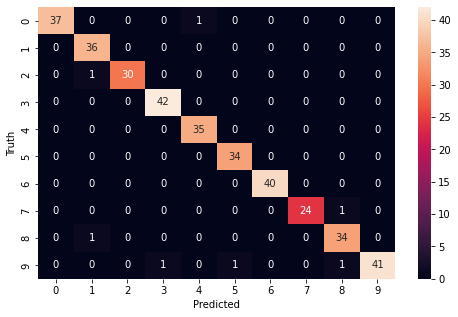

In [28]:
plt.figure(figsize=(8,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted') #predicted data
plt.ylabel('Truth') #actual test daata

In [29]:
# EXERCise:
# 1.Measure prediction score using default n_+estimators(10)
# 2.Now fine tune your model by changing number of trees in your classifier and tell me what best score you can get using how many tress

In [30]:
# Cross Validation:
# Evaluating Model Performance

In [32]:
# Email is spam or not a spam
# 1.first train the model 
# 2. using different dataset to test the model 
# 3.this result (predicted) you can  compare with Truth
# option1:
#     Use all dataset available data for training and test on same dataset , but having problem ?
# option2:
#     Split available dataset into training and test sets by split train_test method , but having problem if train and test dataset be different category then machine trained nothing about test dataset 
# option3:
#     K fold cross validation

In [34]:
# k fold cross validation:
#  1. split all data into 5 groups 
#     2.take 1st group as test data and rest 4 groups as train data then check the score 1
#     3.next take 2nd group as test data and rest 4 groups as train data then check the score 2
#     3.next take 3rd group as test data and rest 4 groups as train data then check the score 3 so on....

In [10]:
digits = load_digits()

In [11]:
from sklearn.model_selection import train_test_split #score value will be changed when you re execute this line

In [12]:
x_train ,x_test, y_train ,  y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [13]:
lr = linear_model.LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9685185185185186

In [14]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.9907407407407407

In [15]:
rf = RandomForestClassifier(n_estimators=40) # parameter tunning n_estimators=40
rf.fit(x_train, y_train)
rf.score(x_test,y_test)

0.9722222222222222

In [16]:
# KFOLD:

In [17]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [18]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]): #to split dataset into train and test dataset into 3 different combinatiion
    print(train_index,test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [20]:
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)
    

In [22]:
get_score(linear_model.LogisticRegression(), x_train, x_test, y_train, y_test)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9685185185185186

In [23]:
get_score(SVC(), x_train, x_test, y_train, y_test)

0.9907407407407407

In [24]:
get_score(RandomForestClassifier(n_estimators=40), x_train, x_test, y_train, y_test)

0.9722222222222222

In [25]:
from sklearn.model_selection import StratifiedKFold

In [29]:
folds = StratifiedKFold(n_splits=3)

In [31]:
scores_l=[]
scores_svm=[]
scores_rf=[]

for train_index, test_index in kf.split(digits.data):
    x_train, x_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                        digits.target[train_index], digits.target[test_index]
    print(get_score(linear_model.LogisticRegression(), x_train, x_test, y_train, y_test))
    print(get_score(SVC(), x_train, x_test, y_train, y_test))
    print(get_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))
    
    scores_l.append(get_score(linear_model.LogisticRegression(), x_train, x_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), x_train, x_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(), x_train, x_test, y_train, y_test))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9232053422370617
0.9666110183639399
0.9382303839732888


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.9415692821368948
0.9816360601001669
0.9549248747913188


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

0.9148580968280468
0.9549248747913188
0.9282136894824707


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [33]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [34]:
scores_rf

[0.9465776293823038, 0.9532554257095158, 0.9282136894824707]

In [35]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score(linear_model.LogisticRegression(), digits.data, digits.target)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [39]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [40]:
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

array([0.93611111, 0.91388889, 0.96100279, 0.9637883 , 0.92200557])

In [ ]:
13: k means clustering algorithm